<a href="https://colab.research.google.com/github/josephfrancis22/loan-prediction-app/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
# os.chdir(r"C:\Loan_predictor") # This path is for a Windows-based system and is not valid in Colab's Linux environment.

In [ ]:
train=pd.read_csv('/content/train .csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
train=pd.read_csv('/content/train .csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

Loan_status = train.Loan_Status
train.drop('Loan_Status', axis=1, inplace=True)

test = pd.read_csv('/content/test.csv')
Loan_ID = test.Loan_ID

data = pd.concat([train, test], ignore_index=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


Before running the following cell, please ensure that you have executed the cells that load and prepare the `train` and `test` data, specifically cell `8kN5HlMu5heK` and cell `xn_8L7CJ5lVV`. These cells are necessary to define the `data` DataFrame correctly.

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [ ]:
data.shape

(981, 12)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [ ]:
data.Dependents.dtypes

dtype('O')

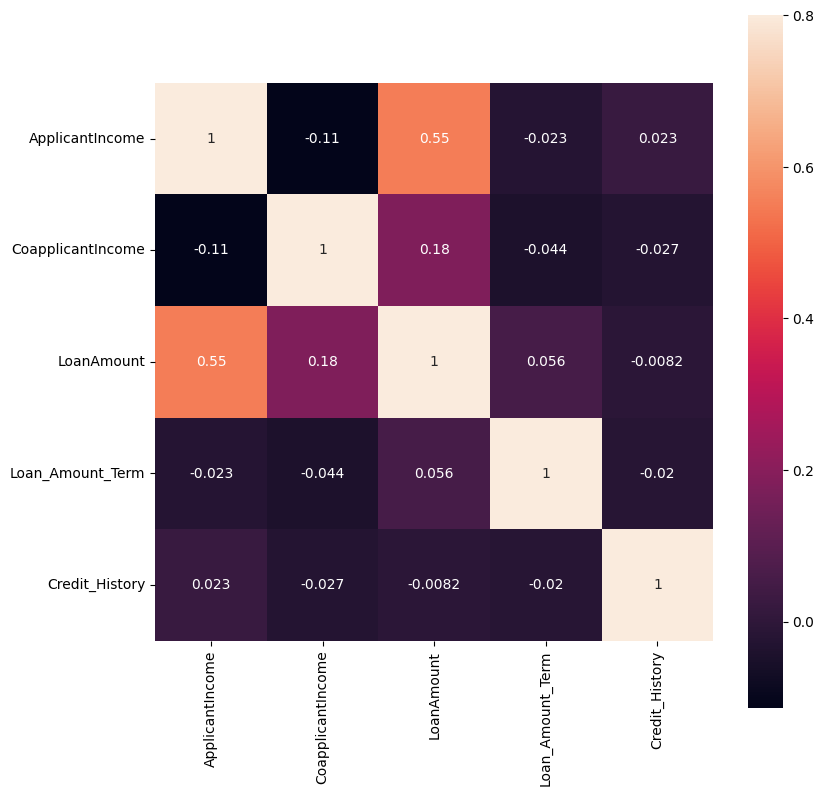

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = data.select_dtypes(include=['int64', 'float64'])
corrmat = numeric_df.corr()

plt.figure(figsize=(9,9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
plt.show()


In [ ]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

,count
Gender,
1.0,775
0.0,182


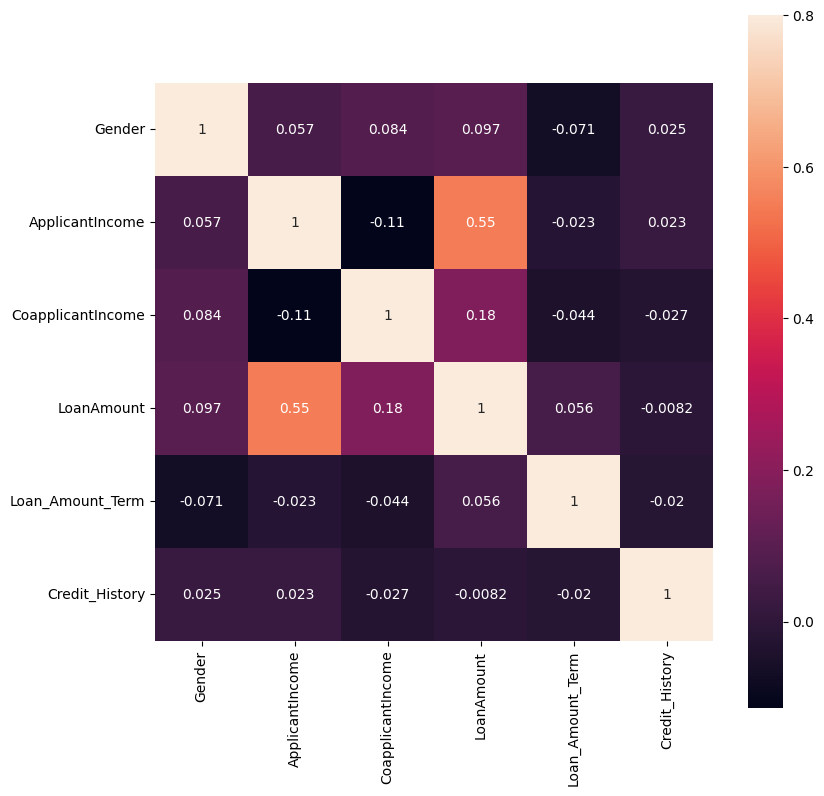

In [ ]:
## Let's see correlations


# Select only numeric columns
corrmat = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(9,9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
plt.show()


In [ ]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [ ]:
data.Married.value_counts()

,count
Married,
1.0,631
0.0,347


In [ ]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [ ]:
data.Dependents.value_counts()

,count
Dependents,
0.0,545
1.0,160
2.0,160
3.0,91


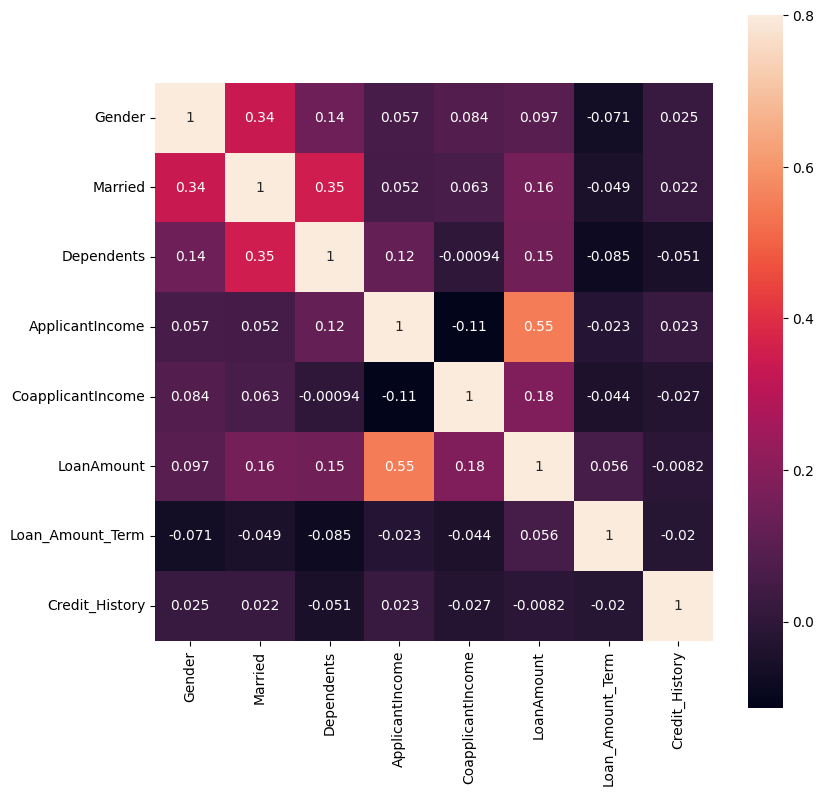

In [ ]:
## Let's see correlations for it
corrmat = data.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(9,9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
plt.show()

In [ ]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [ ]:
data.Education.value_counts()

,count
Education,
1,763
0,218


In [ ]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [ ]:
data.Self_Employed.value_counts()

,count
Self_Employed,
0.0,807
1.0,119


In [ ]:
data.Property_Area.value_counts()

,count
Property_Area,
Semiurban,349
Urban,342
Rural,290


In [ ]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [ ]:
data.Property_Area.value_counts()

,count
Property_Area,
1,349
2,342
0,290


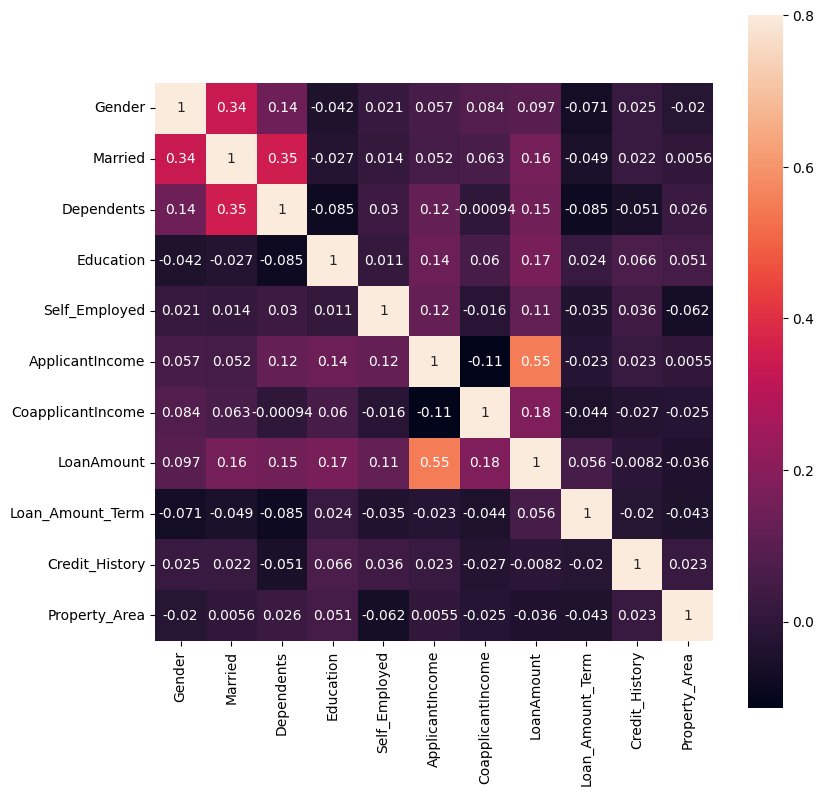

In [ ]:
corrmat = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(9,9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
plt.show()

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
data.Credit_History.size

981

missing value

In [ ]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

/tmp/ipython-input-1277558757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Credit_History.fillna(np.random.randint(0,2),inplace=True)


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [ ]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

/tmp/ipython-input-2616428268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Married.fillna(np.random.randint(0,2),inplace=True)


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,0
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [ ]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

/tmp/ipython-input-3220955809.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)


In [ ]:
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

/tmp/ipython-input-2202096184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,0
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
data.Gender.value_counts()

,count
Gender,
1.0,775
0.0,182


In [ ]:
## Filling Gender with random number between 0-2
from random import randint
data.Gender.fillna(np.random.randint(0,2),inplace=True)

/tmp/ipython-input-2660967319.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Gender.fillna(np.random.randint(0,2),inplace=True)


In [ ]:
data.Gender.value_counts()

,count
Gender,
1.0,775
0.0,206


In [ ]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

/tmp/ipython-input-3037174027.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Dependents.fillna(data.Dependents.median(),inplace=True)


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


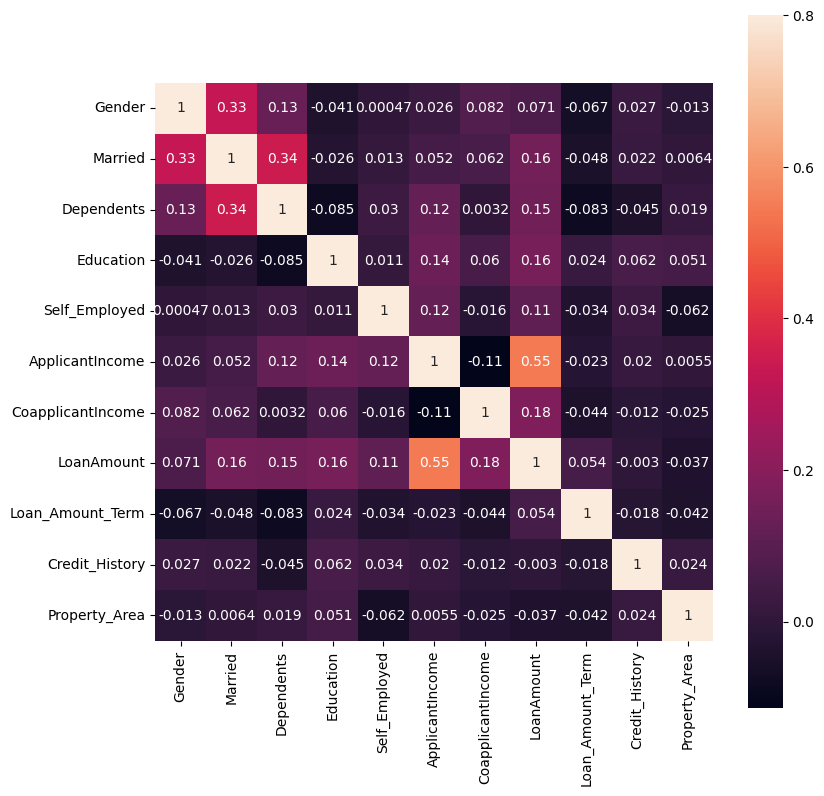

In [ ]:
# Select only numeric columns
corrmat = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(9,9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
plt.show()

In [ ]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

/tmp/ipython-input-474942790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

In [ ]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
data.head()

Split the Data into X & Y

In [ ]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [ ]:
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


Using Different types of Machine Learning Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Fit the all ML Models

In [ ]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [ ]:
scoring='accuracy'

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [ ]:
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    cv_result = cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name, cv_result.mean()))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()
Logistic Regression 0.800000
DecisionTreeClassifier()
Decision Tree 0.695652
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.802174
RandomForestClassifier()
Random Forest 0.778261
SVC()
Support Vector Classifier 0.671739
KNeighborsClassifier()
K- Neirest Neighbour 0.643478
GaussianNB()
Naive Bayes 0.789130


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.8376623376623377
[[ 20  23]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [ ]:
X_test=data.iloc[614:,]
# X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [ ]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
614,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
615,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
616,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
617,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,1.0,2
618,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [ ]:
prediction = LR.predict(X_test)

In [ ]:
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
## TAken data from the dataset
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(t)

[1]


In [141]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [142]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:
cy = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(cy)

[1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
